# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count= combined_data_df["Mouse ID"].nunique()
mice_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data_df[combined_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = combined_data_df[combined_data_df['Mouse ID'].isin(duplicate_mouse_ids)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = combined_data_df[~combined_data_df['Mouse ID'].isin(duplicate_mouse_ids)]
clean_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
mice_clean_data= clean_data_df["Mouse ID"].nunique()
mice_clean_data
#mice_clean_data = clean_data_df["Mouse ID"].value_counts()
#mice_clean_data

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
cleaned_data_df = combined_data_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
grouped_data = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean Tumor Volume': grouped_data.mean(),
    'Median Tumor Volume': grouped_data.median(),
    'Tumor Volume Variance': grouped_data.var(),
    'Tumor Volume Std.Dev.': grouped_data.std(),
    'Tumor Volume SEM ': grouped_data.sem()
})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = cleaned_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)

summary_stats


,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

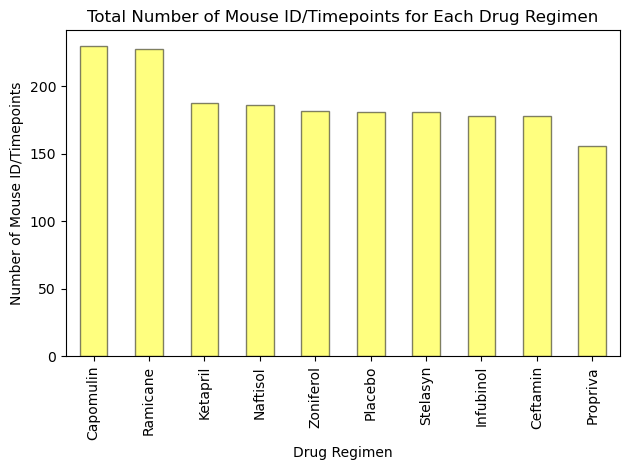

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data_df["Drug Regimen"].value_counts()
#Create a bar plot
regimen_counts.plot(kind='bar', color='yellow', edgecolor= 'black', alpha=0.5, align="center")

#Add labels and title 
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
#Display the plot 
#plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


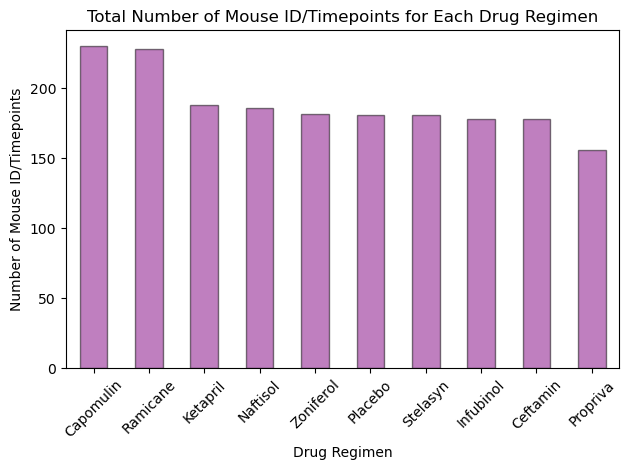

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.


regimen = pd.DataFrame(cleaned_data_df)

# Count the total number of rows (Mouse ID/Timepoints) for each drug regime
regimen_counts = cleaned_data_df['Drug Regimen'].value_counts()

# Create a bar plot
regimen_counts.plot(kind='bar', alpha= 0.5, color='purple', edgecolor='black', align= 'center')

# Add labels and title

plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
# Rotate x-axis labels and adjust layout

plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


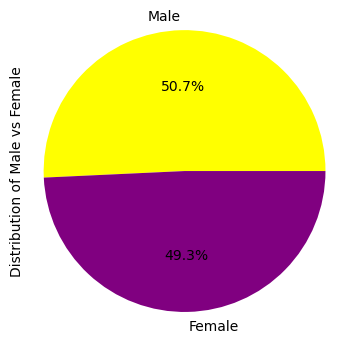

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts= cleaned_data_df['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['yellow', 'purple'], figsize=(4,4))  
plt.ylabel("Distribution of Male vs Female")                                                                                                                                               
plt.axis('equal')
plt.show()

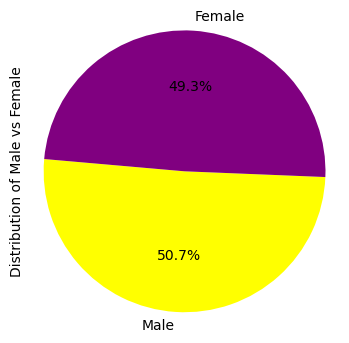

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study


# Get the unique mice with their gender
gender_counts= cleaned_data_df['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels= gender_counts.index, autopct = '%1.1f%%', startangle= 175, colors=['yellow', 'purple'],)
plt.ylabel("Distribution of Male vs Female")                                                                                                                                               
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

combined_data_df = pd.DataFrame(cleaned_data_df)
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = combined_data_df[combined_data_df['Drug Regimen'].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_timepoints, combined_data_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume_filtered = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(selected_regimens)]
print(final_tumor_volume_filtered[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']])

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
combined_data_df = pd.DataFrame(cleaned_data_df)
treatments= ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]
for treatment in treatments:

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol =[]

# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [1]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_vol.boxplot(column= "Tumor Volume (mm3)")
plt. boxplot(cleaned_data_df)
plt.grid
plt.show
figl,axl= plt.subplots()
axl.set_title("Distribution of the Tumor Volume")
axl.set_ylable("Final Tumor Volume (mm3)")
axl.boxplot(treatment)
plt.show()

NameError: name 'plt' is not defined

## Line and Scatter Plots

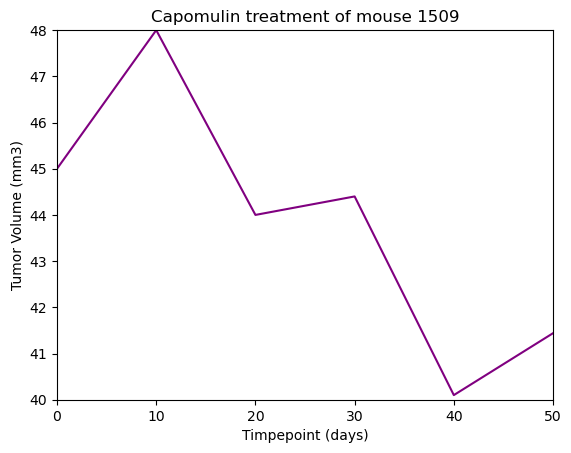

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']
x_axis= np.arange(0, 60, 10)
tumor_vol = [45, 48, 44, 44.4,40.1, 41.44]
plt.plot(x_axis, tumor_vol, color = "purple")
plt.title("Capomulin treatment of mouse 1509")
plt.xlabel("Timpepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(0, 50)
plt.ylim(40, 48)

plt.show()

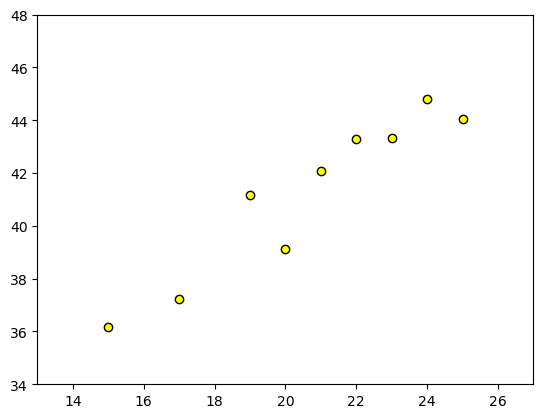

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_data_df[cleaned_data_df['Drug Regimen'] == 'Capomulin']
weight_average = capomulin_data.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
plt.scatter(weight_average.index, weight_average.values, marker="o", facecolors="yellow", edgecolors="black")
xlabel="weight(g)"
ylabel="Average Tumor Vol(mm3)"
plt.ylim(34,48)
plt.xlim(13,27)

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


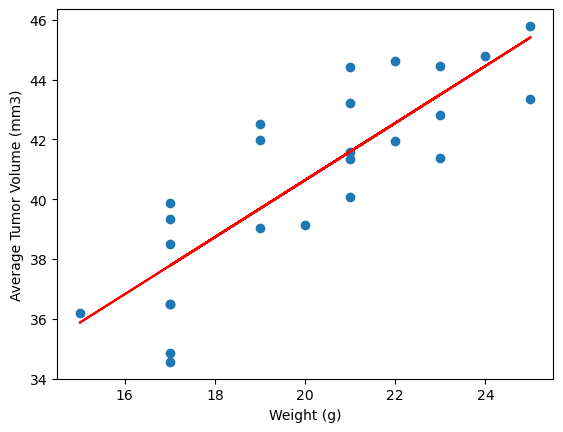

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
